In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sssm import SSSM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
A = {0:np.array([[1,1],[0,1]]), 1:np.array([[1,-1],[0,1]]), 2:np.array([[1,0],[0,1]])}
B = {0:np.array([[1,0]]), 1:np.array([[1,0]]), 2:np.array([[1,0]])}
K,S,O = 3, 2, 1
pi_m = {0:np.array([0,0.8]), 1:np.array([0,0.8]), 2:np.array([0,0.8])}
pi_s = {0:np.eye(S)*0.1, 1:np.eye(S)*0.1, 2:np.eye(S)*0.1}
E_h = {0:np.eye(S)*0.4, 1:np.eye(S)*0.6, 2:np.eye(S)*0.5}
E_o = {0:0.4, 1:0.5, 2:0.5}

In [3]:
M = np.zeros((K,K))
p0 = np.ones(K)/K
for i in range(K):
    for j in range(K):
        if i == j:
            M[i,j] = 0.9
        else:
            M[i,j] = 0.1/(K-1)

In [4]:
sssm = SSSM(M,p0,A,B,pi_m,pi_s,K,S,O,E_h,E_o,250)

In [5]:
d_states,c_states,observations = sssm.generate_data(250)

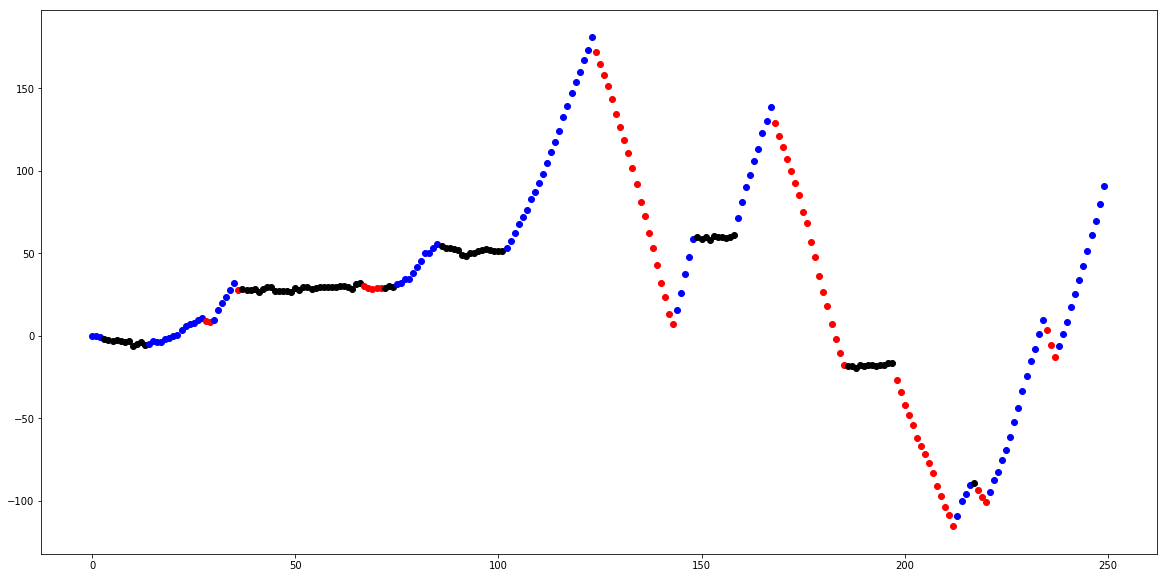

In [6]:
plt.figure(figsize=(20,10))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["blue","red","black"][d_states[time]])
    time += 1

In [7]:
A = {0:np.array([[1,1],[0,1]]), 1:np.array([[1,0],[0,1]])}
B = {0:np.array([[1,0]]), 1:np.array([[1,0]])}
K,S,O = 2, 2, 1
pi_m = {0:np.array([0,0.8]), 1:np.array([0,0.8])}
pi_s = {0:np.eye(S)*0.1, 1:np.eye(S)*0.1}
E_h = {0:np.eye(S)*0.4, 1:np.eye(S)*0.6}
E_o = {0:0.4, 1:0.5}

M = np.zeros((K,K))
p0 = np.ones(K)/K
for i in range(K):
    for j in range(K):
        if i == j:
            M[i,j] = 0.8
        else:
            M[i,j] = 0.2/(K-1)

In [8]:
sssm_infer = SSSM(M,p0,A,B,pi_m,pi_s,K,S,O,E_h,E_o,250)

In [9]:
h, H ,gamma = sssm_infer.structured_vi(observations,num_iterations=50)

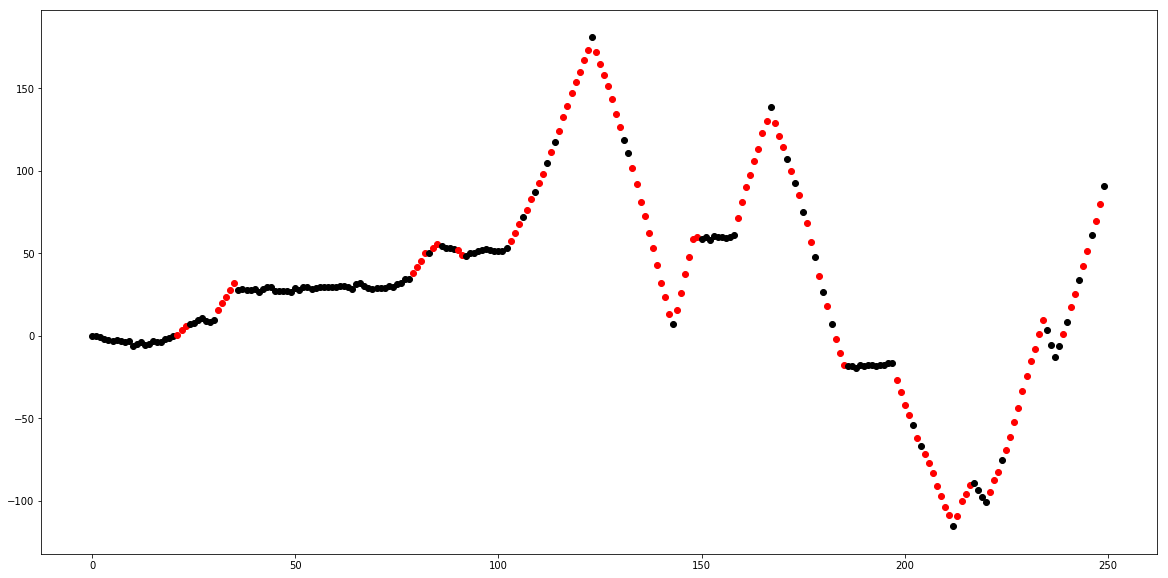

In [10]:
plt.figure(figsize=(20,10))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["red","black"][np.argmax(gamma[:,time])])
    time += 1

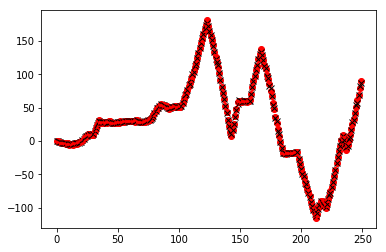

In [11]:
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h[i][0],'kx')
plt.show()